# Handwritten Digit Recognition using LeNet-5 Architecture

### 1. About

Implementation of the LeNet-5 architecture proposed by Yann LeCun et al., Gradient based learning applied to document recognition, 1998. for Handwritten digit recognition task.


### 2. Imports

This architecture have been implemented with the help of TensorFlow Keras library. We download the MNIST dataset from Keras dataset module. For the loss function we use Sparse Catergorical Crossentropy loss function and train the network with Adam optimizer

In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Input, layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### 3. Dataset

Download the dataset from Keras datset module and load it to `train_images`, `train_labels` and `test_images`, `test_labels`.

`train_images`, `test_images` contain 28x28 grayscale training and test images.

`train_labels`, `test_labels` contain integer values 0 through 9 which corresponds to the ground truth label of the training and tes images.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 4. Feature scaling

The MNIST dataset contains images of dimension 28x28, where each value in the 2-D space represents the pixel value from 0 - 255. We scale the range down to 0 - 1. When a feature takes on a large range of value, any small change in the value of the feature results in a huge change in loss. Scaling down the range of feature to a smaller scale makes the loss curve smoother which helps our loss to converge to the global minima faster.

In [3]:
train_images = train_images / 255
test_images = test_images / 255

### 5. Visualization

Visualizing the first 5 examples and its corresponding ground truth label of the training data.

Image:


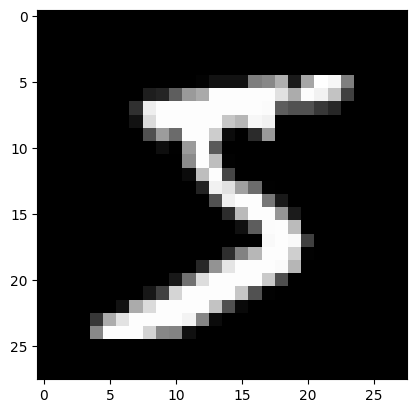

Label: 5
Image:


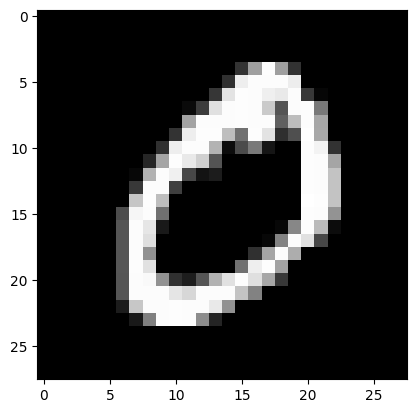

Label: 0
Image:


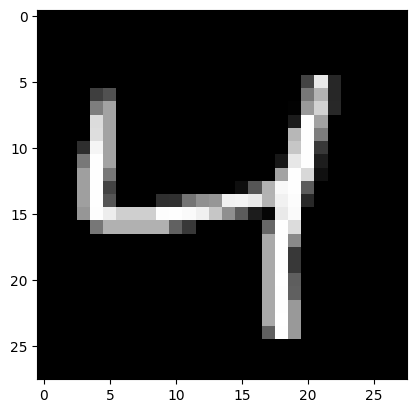

Label: 4
Image:


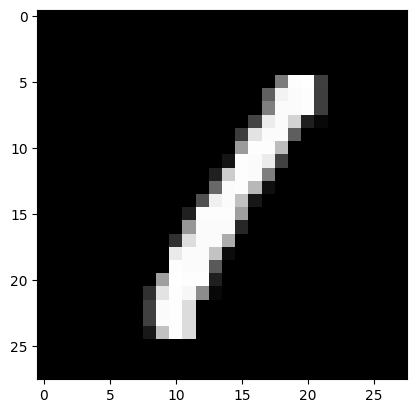

Label: 1
Image:


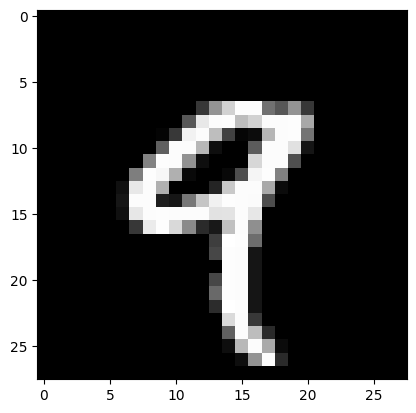

Label: 9


In [6]:
for i in range(5):
    print("Image:")
    plt.imshow(train_images[i], cmap = 'gray')
    plt.show()
    print(f"Label: {train_labels[i]}")

### 6. Dataset shape

We analyze the shape of our dataset before feeding them into the Neural Network.

In [7]:
print(f"Train images: {train_images.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}")
print(f"Test labels: {test_labels.shape}")

Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


### 7. Reshaping data

Our training and test dataset is a 3-D vector where the first dimention corresponds to the batch size, the second dimension represents the height of images and the third dimension represents the width. 2D Convolutional layer accepts a 4-D tensor as input where the fourth dimension represents the number of channels in the image. MNIST dataset contains grayscale images so the number of channels is 1. Thus we reshape our training and test datsets to the shape `(number_of_examples, 28, 28, 1)`.

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [9]:
print(f"Train images: {train_images.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}")
print(f"Test labels: {test_labels.shape}")

Train images: (60000, 28, 28, 1)
Train labels: (60000,)
Test images: (10000, 28, 28, 1)
Test labels: (10000,)


### 8. Zero padding

In the original paper, Yann LeCun et al., have used 6 filters of size 5x5 with stride 1 in the first convolutional layer. When the input size is 32x32 we get 28x28 feature maps, it is desirable as potential distinctive features such as stroke end-points or corner can appear in the center of the receptive field of the highest-level feature detectors. Hence we add zero padding to the images in MNIST dataset to form 32x32 examples.

In [10]:
train_images = np.pad(train_images, pad_width=((0,0),(2,2),(2,2),(0,0)), mode='constant', constant_values=0)
test_images = np.pad(test_images, pad_width=((0,0),(2,2),(2,2),(0,0)), mode='constant', constant_values=0)

In [11]:
print(f"Train images: {train_images.shape}")
print(f"Test images: {test_images.shape}")

Train images: (60000, 32, 32, 1)
Test images: (10000, 32, 32, 1)


### 9.LeNet-5 model


LeNet-5 is the first "popular" CNN architecture. It contains 3 convolutional layers, 2 pooling layers and 2 fully-connected layers.

Layer C1 is a convolutional layer with 6 filters of kernel size 5x5, stride 1 and uses "tanh" non-linearity activation function. It produces 6 activation maps of size 28x28.
Layer S2 is an average pooling layer of pool size 2x2 and strides 2, thus it effectively dowsamples the 28x28 activation maps of C1 to 14x14.
Layer C3 is another convolutional layer with 16 filters of kernel size 5x5, stride 1 and "tanh" non-linearity activation function. It produces 16 activation maps of size 10x10.
Layer S4 is another pooling layer of pool size 2x2 and strides 2, it dowsamples the 10x10 activation maps of C3 to 5x5.
Layer C5 is the final convolutional layer with 120 filters of kernel size 5x5, stride 1 and uses "tanh" non-linearity activation function. It produces 120 activation maps of size 1x1.
We flatten the 1x1x120 output of C5 to form a 1-dimensional vector as fully-connected layers only accept 1-D vector input.
Layer F6 is a fully-connected layer of 84 units with "tanh" activation function.
Layer F7 is a fully-connected layer of 10 units with "softmax" activation function.


The average pooling layers in the original paper is a bit more complicated. Each neuron computes the mean of its inputs, then multiplies the mean with a weight and adds a bias term. Both are learnable parameters.

The output layer in the original paper uses Radial Basis Function (RBF), which computes the square of the Euclidian distance between its input vector and weight vector.

In [12]:
model = models.Sequential([
    layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = "tanh", input_shape = (train_images.shape[1 : 4])),
    layers.AveragePooling2D(pool_size = 2, strides = 2, padding = "valid"),
    layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = "tanh"),
    layers.AveragePooling2D(pool_size = 2, strides = 2, padding = "valid"),
    layers.Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = "tanh"),
    layers.Flatten(),
    layers.Dense(units = 84, activation = "tanh"),
    layers.Dense(units = 10, activation = "linear")

])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

### 10. Hyperparameters & Model training


We use Sparse Categorical Crossentropy as it penalizes bad predictions much harsher producing larger graddients, which in turn helps the loss to converge faster.

We train the model using Adam optimizer with a learning rate of 0.001 in batch size of 32 and run 20 epochs.

The particular choice of small learning rate and batch size helped minimize overshooting the minima and produce satisfactory result on MNIST dataset, 98.5+ % in 20 epochs.

The network was trained on the following specifications:

- Ryzen R7 4800H
- 16GB DDR4 3200Mhz
- GTX 1660Ti Max-Q 6GB

In [14]:
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = SparseCategoricalCrossentropy(from_logits = "True"),
    metrics = ['accuracy']
)

In [15]:
model.fit(
    train_images, train_labels,
    epochs = 20,
    batch_size = 32
)

Epoch 1/20
1875/1875 [==============================] - 17s 6ms/step - loss: 0.2277 - accuracy: 0.9327
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0872 - accuracy: 0.9728
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0595 - accuracy: 0.9814
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0467 - accuracy: 0.9856
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0374 - accuracy: 0.9880
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0320 - accuracy: 0.9896
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0256 - accuracy: 0.9914
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0239 - accuracy: 0.9922
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0201 - accuracy: 0.9931
Epoch 10/20
1875/1875 [==============================] - 12s 6ms/step - l

### 11. Performance

This LeNet-5 network achieved 98.5+ % accuracy on average, and its best performance in 100 runs was 98.92%.

In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0419 - accuracy: 0.9889


[0.041930414736270905, 0.9889000058174133]

### 12. Conclusion

LeNet-5 architecture as proposed by Yann LeCun et al., is one of the most influential work in the world of computer vision. It was the first time a convolutional neural network was used to attain very impressive performance on handwritten digit recognition. The model is very simple and composed of a few layers and is very inexpensive computationally. This work had thrown light on the use of CNNs to solve vision problems, and laid the foundations for more complicated models that tackle image classification problems such as AlexNet, VGGNet, ResNet, etc,. Although newer and more advanced state-of-the-art architectures can outperform this simple neural net, it is still widely used for digit recognition problems such as reading vehicle number plate, processing bank cheques, mails, etc,. for its simplicity. With only ~ 60,000 parameters, LeNet-5 can be scaled up and trained on low power machines. Further fine-tuning its parameters through transfer learning can boost performance on specific vision tasks.


The original paper describes the network architecture in more detail and is worth a read => [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)